## Цель проекта: подготовка данных для построения модели ML, предсказывющей успеваемость по математике учащихся в возрасте от 15 до 22 лет в зависимости от условий жизни. 
## Задачи проекта: оценка данных, обнаружение отклонений и аномалий, очистка данных, выявление параметров, влияющих на успеваемость студентов

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import random

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

score = pd.read_csv('stud_math.csv')

Функции, которые понадобятся для анализа:

In [2]:
'''Функция, возвращающая диаграмму размаха'''


def boxplot(parameter):
    return sns.boxplot(x=parameter, y='score', data=score)


'''Функция для приведения строков значений "yes" и "no" в числовые'''


def yes_no(row):
    if row[parameter] == "yes":
        return 1
    elif row[parameter] == "no":
        return 0
    else:
        return row[parameter]
    return row[parameter]

'''Функция для удаления выбросов'''

def del_emissions(column):
    drop_index = []
    Q1 = score[column].quantile(0.25)
    Q3 = score[column].quantile(0.75)
    IQR = Q3-Q1
    for i in range(len(score)):
        if (score.iloc[i][column] > (Q3 + 1.5*IQR) or 
            score.iloc[i][column] < (Q1 - 1.5*IQR)):
            drop_index.append(score.index[i])
    return drop_index


'''Функция для заполнение пропусков медианным значением'''


def fill_median(row):
    if pd.isna(row[parameter]):
        return score[parameter].median()
    return row[parameter]


'''Функция для заполнения пропусков значением "no data"'''


def fill_no_data(row):
    if pd.isna(row[parameter]):
        return "no data"
    return row[parameter]


'''Функция для заполнения пропусков в "traveltime"'''


def fill_traveltime(row):
    if pd.isna(row['traveltime']):
        if row['address'] == 'U':
            return 1
        elif row['address'] == 'R':
            return 2
        else:
            return row['traveltime']
    return row['traveltime']


'''Функция для заполнения пропусков в "address"'''


def fill_address(row):
    if pd.isna(row['address']):
        if row['traveltime'] == 1:
            return 'U'
        elif row['traveltime'] > 1:
            return 'R'
        else:
            return row['address']
    return row['address']


'''Функция для заполнения пропусков в "failures"'''


def fill_failures(row):
    if pd.isna(row['failures']):
        if row['higher'] == 1:
            return 0
        else:
            return 1
    return row['failures']


'''Функция для заполнения пропусков в "famsup"'''


def fill_famsup(row):
    if pd.isna(row['famsup']):
        if row['school'] == 'GP':
            return 1
        else:
            return 0
    return row['famsup']


'''Функция для заполнения пропусков в "paid"'''


def fill_paid(row):
    if pd.isna(row['paid']):
        if row['famsup'] == 0:
            return 0
        elif row['famsup'] == 1:
            return 1
        else:
            return row['paid']
    return row['paid']


'''Функция для заполнения пропусков в "activities"'''


def fill_activities(row):
    if pd.isna(row['activities']):
        if row['sex'] == 'F':
            return 0
        else:
            return 1
    return row['activities']


'''Функция для заполнения пропусков в "nursery"'''


def fill_nursery(row):
    if pd.isna(row['nursery']):
        if row['Medu'] == 2 or row['Medu'] == 4:
            return 1
        else:
            return 0
    return row['nursery']


'''Функция, генерирующая новый параметр "Mhealth" (работает ли мать студента в здравоохранении)'''


def fill_Mhealth(row):
    if row['Mjob'] == 'health':
        return 1
    return 0


'''Функция, генерирующая новый параметр "Fteacher" (работает ли отец судента учителем)'''


def fill_Fteacher(row):
    if row['Fjob'] == 'teacher':
        return 1
    return 0


'''Функция, возвращающая обновленную таблицу с заполненными пропусками указанного параметра'''


def fill_parameter(function):
    score[parameter] = score.apply(function, axis=1)
    return score[parameter].value_counts()


'''Функция, которая оценивает наличие статистически значимых различий для конкретного параметра'''


def get_stat_dif(column):
    cols = score.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(score.loc[score.loc[:, column] == comb[0], 'score'],
                     score.loc[score.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для параметра', column)
            break

In [3]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [4]:
score.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


Так как нас интересует параметр "score", то в первую очередь посмотрим на его распределение. Максимальное значение равно 100, а минимальное - 0.

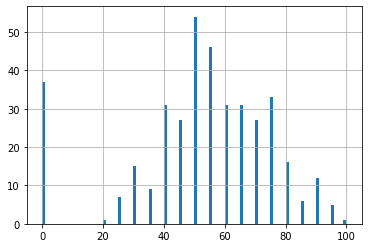

In [5]:
score.score.hist(bins=100)

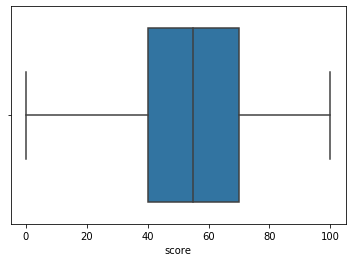

In [6]:
sns.boxplot(x='score', data=score)

На гистограмме видно, что основная часть значений распределена примерно нормально, в то время как данные со значением параметра "score", равным нулю, выбиваются из общей картины. Можно предположить, что студенты, получившие "нуль" на экзамене, скорее всего на него не явились, а значит строки с таким значением "score" следует удалить. Их можно использовать в параллельном исследовании причин неявки студентов, если будет достоверно известно, что такая оценка связанна именно с этим. Так же стоит удалить строки, с отсутствующими данными по оценке на экзамене. 

In [7]:
drop_index = []
for i in range(len(score)):
    if pd.isna(score.iloc[i]['score']) or score.iloc[i]['score'] == 0:
        drop_index.append(score.index[i])
score.drop(drop_index, inplace=True, axis=0)

Многие параметры имеют значения "yes" или "no". Преобразуем их в "1" или "0" соответственно для простоты анализа. В целом остальные пераметры тоже можно было бы заменить на числовые значения, но такая замена не будет столь же очевидной и легкой для восприятия, и может привести к ошибкам.

In [8]:
for word in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    parameter=word
    fill_parameter(yes_no)

Проверим корреляцию всех числовых параметров. В особенности нас интересует параметр "studytime, granular". Значение этого столбца в условии описано не было.

In [9]:
score.corr()

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
age,1.000000,-0.122979,-0.121617,0.095370,-0.011426,0.235875,-0.258382,-0.130566,-0.028782,-0.135034,-0.113363,0.011426,-0.208899,-0.116205,0.184115,0.074152,0.004837,0.123638,-0.056173,0.112599,-0.131542
Medu,-0.122979,1.000000,0.247339,-0.165394,0.070533,-0.205944,-0.060458,0.183037,0.160031,0.126379,0.184227,-0.070533,0.208254,0.206314,0.061231,-0.000958,0.021002,0.080556,-0.038050,-0.027377,0.186477
Fedu,-0.121617,0.247339,1.000000,0.042074,0.049060,-0.141995,0.002924,0.139102,-0.002853,0.097034,0.109370,-0.049060,0.094268,0.093895,-0.018113,0.049613,-0.071328,-0.026507,0.025874,0.000245,0.069842
traveltime,0.095370,-0.165394,0.042074,1.000000,-0.101490,0.091757,-0.013595,-0.025133,-0.046143,0.008461,-0.045096,0.101490,-0.131574,-0.080662,0.037071,-0.023920,-0.023067,0.029374,-0.000092,-0.047560,-0.075516
studytime,-0.011426,0.070533,0.049060,-0.101490,1.000000,-0.156406,0.011581,0.149031,0.198909,0.103263,0.076343,-1.000000,0.144305,0.094741,0.066033,0.063856,-0.128661,-0.029686,-0.085469,-0.030187,0.142055
failures,0.235875,-0.205944,-0.141995,0.091757,-0.156406,1.000000,0.064154,-0.068557,-0.120631,-0.085556,-0.126890,0.156406,-0.312959,-0.116756,0.092584,-0.011414,0.127391,0.126770,0.064083,0.089541,-0.289377
schoolsup,-0.258382,-0.060458,0.002924,-0.013595,0.011581,0.064154,1.000000,0.088713,-0.038182,0.062271,0.032605,-0.011581,0.039287,0.004294,-0.038722,0.001143,-0.051172,-0.031778,-0.031519,0.104768,-0.249796
famsup,-0.130566,0.183037,0.139102,-0.025133,0.149031,-0.068557,0.088713,1.000000,0.302639,0.003314,0.043878,-0.149031,0.123207,0.081018,-0.002160,-0.009079,0.025334,-0.025956,0.045104,0.067334,-0.046874
paid,-0.028782,0.160031,-0.002853,-0.046143,0.198909,-0.120631,-0.038182,0.302639,1.000000,0.029352,0.113315,-0.198909,0.181817,0.171799,0.067568,-0.025820,-0.057744,0.052188,-0.047937,-0.031287,-0.022039
activities,-0.135034,0.126379,0.097034,0.008461,0.103263,-0.085556,0.062271,0.003314,0.029352,1.000000,0.022796,-0.103263,0.038385,0.073802,-0.018133,0.083961,0.091959,0.045251,0.029730,-0.080459,0.060008


Обнаружено, что "studytime, grnular" полностью коррелирует с параметром "studytime" (обратная корреляция), а значит параметр "studytime, granular" можно не рассматривать, как самостоятельный в последующем исследовании. Также можно предварительно оценить, какие из числовых параметров могут влиять на оценку студента. Будем учитывать параметру, для которых коэффициент корреляции с "score" более чем 0.1 по модулю. Таким образом, можно выделить "age", "Medu", "studytime", "failures", "schoolsup", "higher" и "goout".

In [10]:
score.drop('studytime, granular', inplace=True, axis=1)

In [11]:
score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      352 non-null    object 
 1   sex         352 non-null    object 
 2   age         352 non-null    int64  
 3   address     338 non-null    object 
 4   famsize     328 non-null    object 
 5   Pstatus     311 non-null    object 
 6   Medu        350 non-null    float64
 7   Fedu        331 non-null    float64
 8   Mjob        335 non-null    object 
 9   Fjob        320 non-null    object 
 10  reason      337 non-null    object 
 11  guardian    323 non-null    object 
 12  traveltime  329 non-null    float64
 13  studytime   345 non-null    float64
 14  failures    332 non-null    float64
 15  schoolsup   343 non-null    float64
 16  famsup      316 non-null    float64
 17  paid        316 non-null    float64
 18  activities  340 non-null    float64
 19  nursery     340 non-null    f

Далее рассмотрим подробно значения каждого числового параметра в отдельности. Проверим на выбросы и пропуски.

### 1. Параметр "age". Пропусков нет, проверим на выбросы.

In [12]:
score.age.value_counts()

16    96
17    90
15    76
18    69
19    16
20     3
22     1
21     1
Name: age, dtype: int64

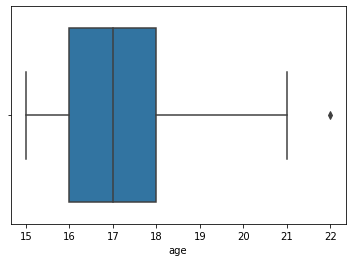

In [13]:
sns.boxplot(x='age', data=score)

In [14]:
score.drop(del_emissions("age"), inplace=True, axis=0)

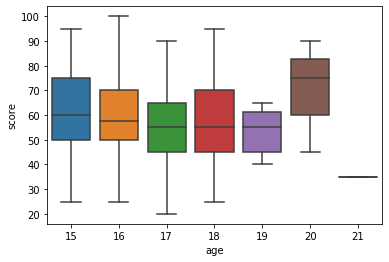

In [15]:
boxplot('age')

### 2. Параметр "Medu". Здесь всего 2 пропуска.

In [16]:
score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      351 non-null    object 
 1   sex         351 non-null    object 
 2   age         351 non-null    int64  
 3   address     337 non-null    object 
 4   famsize     327 non-null    object 
 5   Pstatus     310 non-null    object 
 6   Medu        349 non-null    float64
 7   Fedu        330 non-null    float64
 8   Mjob        334 non-null    object 
 9   Fjob        319 non-null    object 
 10  reason      336 non-null    object 
 11  guardian    322 non-null    object 
 12  traveltime  328 non-null    float64
 13  studytime   344 non-null    float64
 14  failures    331 non-null    float64
 15  schoolsup   342 non-null    float64
 16  famsup      315 non-null    float64
 17  paid        315 non-null    float64
 18  activities  339 non-null    float64
 19  nursery     339 non-null    f

In [17]:
score.Medu.value_counts()

4.0    125
2.0     88
3.0     86
1.0     47
0.0      3
Name: Medu, dtype: int64

Заполним пропуски медианным значением и проверим на выбросы.

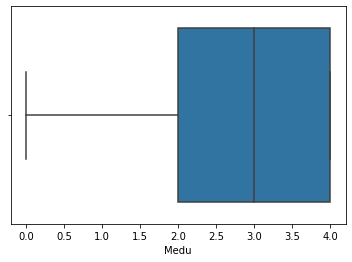

In [18]:
sns.boxplot(x='Medu', data=score)

In [19]:
parameter='Medu'
fill_parameter(fill_median)

4.0    125
2.0     88
3.0     88
1.0     47
0.0      3
Name: Medu, dtype: int64

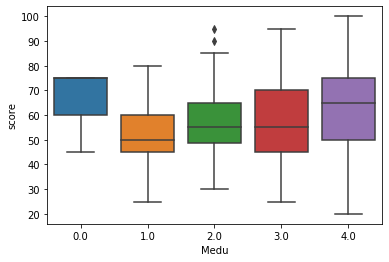

In [20]:
boxplot('Medu')

### 3. Параметр "Fedu". Здесь довольно много пропусков - 21.

In [21]:
score.Fedu.value_counts()

2.0     94
3.0     89
4.0     80
1.0     64
0.0      2
40.0     1
Name: Fedu, dtype: int64

Обнаружено значение "Fedu" равное 40, это значение не соостветствует предложенному диапазону значений. Можно было бы предположить, что это просто описка, и правильное значение равно 4.

In [22]:
def fill_Fedu(row):
    if row['Fedu'] == 40:
        return 4
    return row['Fedu']


score['Fedu'] = score.apply(fill_Fedu, axis=1)

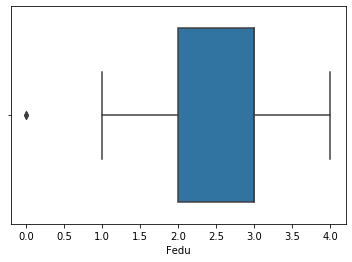

In [23]:
sns.boxplot(x='Fedu', data=score)

In [24]:
score.drop(del_emissions('Fedu'), inplace=True, axis=0)

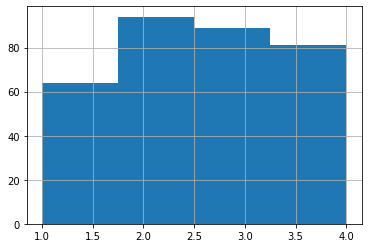

In [25]:
score.Fedu.hist(bins=4)

In [26]:
score.Fedu.median()

3.0

В данном случае заполнять пропуски медианным значением некорректрно, так как пропусков довально много, а сами значения распределены примерно равномерно (Fedu = 1 to 4), и это может нарушить балланс. Поэтому здесь пропуски заполним значением "no data".

In [27]:
parameter='Fedu'
fill_parameter(fill_no_data)

2.0        94
3.0        89
4.0        81
1.0        64
no data    21
Name: Fedu, dtype: int64

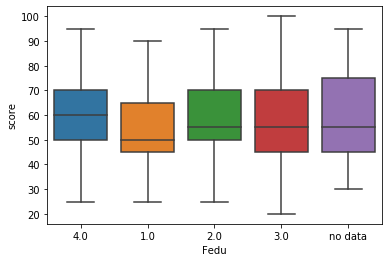

In [28]:
boxplot('Fedu')

### 4. Параметр "traveltime". Количество пропусков - 23.

In [29]:
score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      349 non-null    object 
 1   sex         349 non-null    object 
 2   age         349 non-null    int64  
 3   address     335 non-null    object 
 4   famsize     326 non-null    object 
 5   Pstatus     308 non-null    object 
 6   Medu        349 non-null    float64
 7   Fedu        349 non-null    object 
 8   Mjob        332 non-null    object 
 9   Fjob        317 non-null    object 
 10  reason      334 non-null    object 
 11  guardian    320 non-null    object 
 12  traveltime  326 non-null    float64
 13  studytime   342 non-null    float64
 14  failures    330 non-null    float64
 15  schoolsup   340 non-null    float64
 16  famsup      313 non-null    float64
 17  paid        313 non-null    float64
 18  activities  337 non-null    float64
 19  nursery     337 non-null    f

In [30]:
score.traveltime.value_counts()

1.0    218
2.0     84
3.0     17
4.0      7
Name: traveltime, dtype: int64

Предположим, что среднее "traveltime" для студентов больше для студентов, живущих загородом (address = R).

In [31]:
score.pivot_table(index=['address'],
                  values='traveltime', aggfunc='median', fill_value=0)

,traveltime
address,
R,2
U,1


Действительно, медианное значение "traveltime" для городских меньше, заполним пропускт соответственно.

In [32]:
parameter='traveltime'
fill_parameter(fill_traveltime)

1.0    233
2.0     89
3.0     17
4.0      7
Name: traveltime, dtype: int64

Остается 3 пропуска, их можно заполнить медианным значением

In [33]:
parameter='traveltime'
fill_parameter(fill_median)
score.traveltime.value_counts()

1.0    236
2.0     89
3.0     17
4.0      7
Name: traveltime, dtype: int64

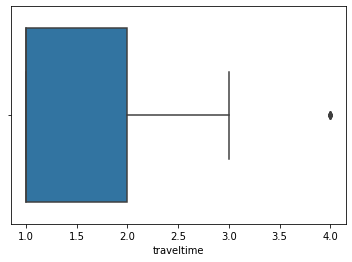

In [34]:
sns.boxplot(x='traveltime', data=score)

In [35]:
score.drop(del_emissions('traveltime'), inplace=True, axis=0)

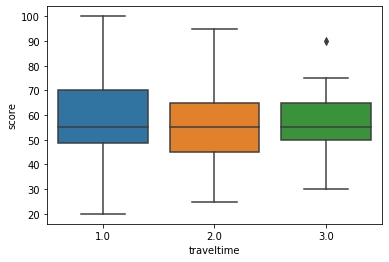

In [36]:
boxplot('traveltime')

### 5. Параметр "studytime". Количество пропусков - 7. Их можно будет заполнить медианным значением.

In [37]:
score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      342 non-null    object 
 1   sex         342 non-null    object 
 2   age         342 non-null    int64  
 3   address     328 non-null    object 
 4   famsize     320 non-null    object 
 5   Pstatus     303 non-null    object 
 6   Medu        342 non-null    float64
 7   Fedu        342 non-null    object 
 8   Mjob        325 non-null    object 
 9   Fjob        310 non-null    object 
 10  reason      327 non-null    object 
 11  guardian    314 non-null    object 
 12  traveltime  342 non-null    float64
 13  studytime   335 non-null    float64
 14  failures    324 non-null    float64
 15  schoolsup   333 non-null    float64
 16  famsup      309 non-null    float64
 17  paid        307 non-null    float64
 18  activities  330 non-null    float64
 19  nursery     330 non-null    f

In [38]:
score.studytime.value_counts()

2.0    170
1.0     86
3.0     57
4.0     22
Name: studytime, dtype: int64

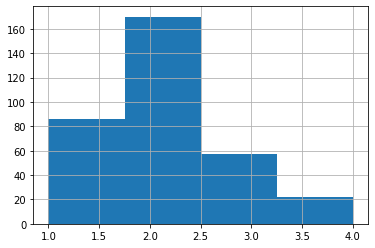

In [39]:
score.studytime.hist(bins=4)

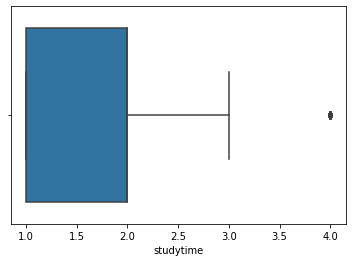

In [40]:
sns.boxplot(x='studytime', data=score)

In [41]:
score.drop(del_emissions('studytime'), inplace=True, axis=0)

In [42]:
parameter='studytime'
fill_parameter(fill_median)

2.0    177
1.0     86
3.0     57
Name: studytime, dtype: int64

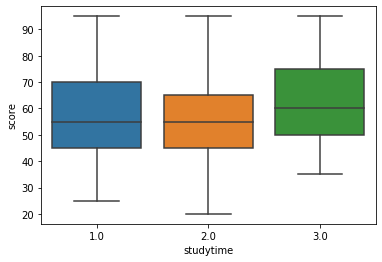

In [43]:
boxplot('studytime')

### 6. Параметр "failures". Количество пропусков - 17.

In [44]:
score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      320 non-null    object 
 1   sex         320 non-null    object 
 2   age         320 non-null    int64  
 3   address     306 non-null    object 
 4   famsize     298 non-null    object 
 5   Pstatus     286 non-null    object 
 6   Medu        320 non-null    float64
 7   Fedu        320 non-null    object 
 8   Mjob        303 non-null    object 
 9   Fjob        290 non-null    object 
 10  reason      306 non-null    object 
 11  guardian    292 non-null    object 
 12  traveltime  320 non-null    float64
 13  studytime   320 non-null    float64
 14  failures    303 non-null    float64
 15  schoolsup   311 non-null    float64
 16  famsup      288 non-null    float64
 17  paid        286 non-null    float64
 18  activities  308 non-null    float64
 19  nursery     308 non-null    f

In [45]:
score.failures.value_counts()

0.0    248
1.0     37
2.0     11
3.0      7
Name: failures, dtype: int64

При расчетах коэффициентв корреляции наибольшими (по модулю) для "failures" оказался параметр "higher". Проверим, сможем ли мы использовать это для заполнения пропусков.

In [46]:
print(score.pivot_table(index='higher',
                  values='failures', aggfunc='median', fill_value=0))

        failures
higher          
0.0            1
1.0            0


Как видим, медианные значения "failures" отличается для студентов, кто не планируют получать высшее образование. Параметр "higher" также имеет пропуски. Необходимо заполнить их прежде, чем заполнять пропуски в "failures". 

### 7. Параметр "higher". Количество пропусков - 19

In [47]:
score.higher.value_counts()

1.0    293
0.0     11
Name: higher, dtype: int64

Найдено, что основная часть студентов собирается получать высшее образование. Заполним пропуски медианным значением.

In [48]:
parameter='higher'
fill_parameter(fill_median)

1.0    309
0.0     11
Name: higher, dtype: int64

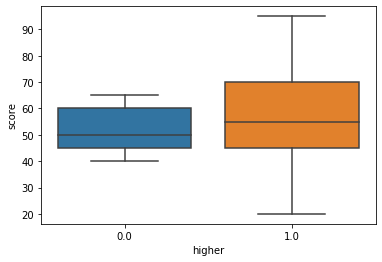

In [49]:
boxplot('higher')

Теперь можно заполнить пропуски в "failures"

In [50]:
parameter='failures'
fill_parameter(fill_failures)

0.0    265
1.0     37
2.0     11
3.0      7
Name: failures, dtype: int64

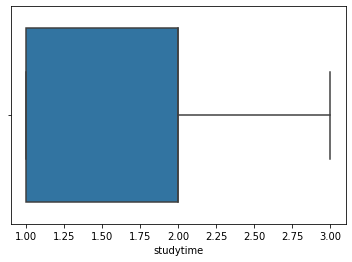

In [51]:
sns.boxplot(x='studytime', data=score)

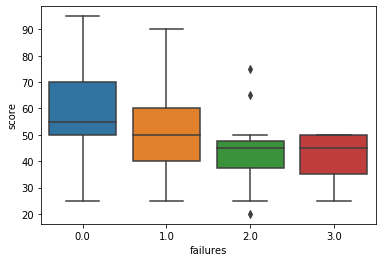

In [52]:
boxplot('failures')

### 8. Параметр "schoolsup". Количество пропусков - 9.

In [53]:
score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      320 non-null    object 
 1   sex         320 non-null    object 
 2   age         320 non-null    int64  
 3   address     306 non-null    object 
 4   famsize     298 non-null    object 
 5   Pstatus     286 non-null    object 
 6   Medu        320 non-null    float64
 7   Fedu        320 non-null    object 
 8   Mjob        303 non-null    object 
 9   Fjob        290 non-null    object 
 10  reason      306 non-null    object 
 11  guardian    292 non-null    object 
 12  traveltime  320 non-null    float64
 13  studytime   320 non-null    float64
 14  failures    320 non-null    float64
 15  schoolsup   311 non-null    float64
 16  famsup      288 non-null    float64
 17  paid        286 non-null    float64
 18  activities  308 non-null    float64
 19  nursery     308 non-null    f

In [54]:
score.schoolsup.value_counts()

0.0    269
1.0     42
Name: schoolsup, dtype: int64

Большинство студентов не берут дополнительные занятия в школе, поэтому заполним пропуски медианным значением.

In [55]:
parameter='schoolsup'
fill_parameter(fill_median)

0.0    278
1.0     42
Name: schoolsup, dtype: int64

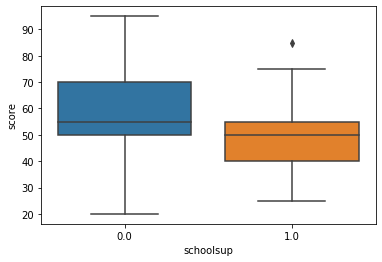

In [56]:
boxplot('schoolsup')

### 9. Параметр "famsup". Количество пропусков довольн большое - 32.

In [57]:
score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      320 non-null    object 
 1   sex         320 non-null    object 
 2   age         320 non-null    int64  
 3   address     306 non-null    object 
 4   famsize     298 non-null    object 
 5   Pstatus     286 non-null    object 
 6   Medu        320 non-null    float64
 7   Fedu        320 non-null    object 
 8   Mjob        303 non-null    object 
 9   Fjob        290 non-null    object 
 10  reason      306 non-null    object 
 11  guardian    292 non-null    object 
 12  traveltime  320 non-null    float64
 13  studytime   320 non-null    float64
 14  failures    320 non-null    float64
 15  schoolsup   320 non-null    float64
 16  famsup      288 non-null    float64
 17  paid        286 non-null    float64
 18  activities  308 non-null    float64
 19  nursery     308 non-null    f

In [58]:
score.famsup.value_counts()

1.0    176
0.0    112
Name: famsup, dtype: int64

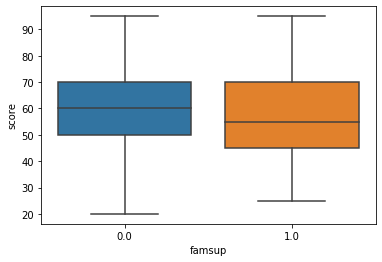

In [59]:
boxplot('famsup')

Коэффициент корреляции для параметров "famsup" и "paid" составляет чуть более 0,3. В случае параметра "paid" также много пропусков. 

In [60]:
score.paid.value_counts()

0.0    156
1.0    130
Name: paid, dtype: int64

In [61]:
print(score.pivot_table(index='paid',
                  values='famsup', aggfunc='median', fill_value=0))

      famsup
paid        
0.0        0
1.0        1


Проверим, есть ли корреляция между "famsup" и каким-либо другим параметром с нечисловыми значениями.

In [62]:
for word in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian']:
    print(score.pivot_table(index=[word],
                  values='famsup', aggfunc='median', fill_value=0))

        famsup
school        
GP           1
MS           0
     famsup
sex        
F         1
M         1
         famsup
address        
R             1
U             1
         famsup
famsize        
GT3           1
LE3           1
         famsup
Pstatus        
A             1
T             1
          famsup
Mjob            
at_home        1
health         1
other          1
services       1
teacher        1
          famsup
Fjob            
at_home        1
health         1
other          1
services       1
teacher        1
            famsup
reason            
course           1
home             1
other            1
reputation       1
          famsup
guardian        
father         1
mother         1
other          1


Обнаружено, что студентам из школы GP чаще получают образовательную поддержку в семье. Можно использовать это для заполнения пропусков.

In [63]:
parameter='famsup'
fill_parameter(fill_famsup)

1.0    207
0.0    113
Name: famsup, dtype: int64

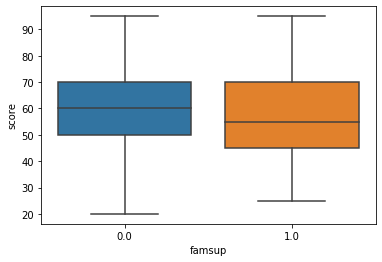

In [64]:
boxplot('famsup')

### 10. Параметр "paid". Заполним пропуски на основании корреляции с параметром "famsup".  

In [65]:
parameter='paid'
fill_parameter(fill_paid)

0.0    165
1.0    155
Name: paid, dtype: int64

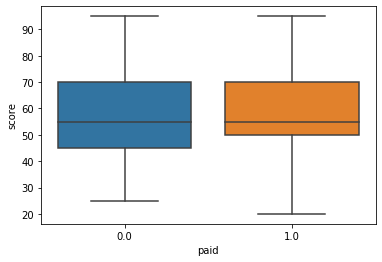

In [66]:
boxplot('paid')

### 11. Параметр "activities". Количество пропусков - 12.

In [67]:
score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      320 non-null    object 
 1   sex         320 non-null    object 
 2   age         320 non-null    int64  
 3   address     306 non-null    object 
 4   famsize     298 non-null    object 
 5   Pstatus     286 non-null    object 
 6   Medu        320 non-null    float64
 7   Fedu        320 non-null    object 
 8   Mjob        303 non-null    object 
 9   Fjob        290 non-null    object 
 10  reason      306 non-null    object 
 11  guardian    292 non-null    object 
 12  traveltime  320 non-null    float64
 13  studytime   320 non-null    float64
 14  failures    320 non-null    float64
 15  schoolsup   320 non-null    float64
 16  famsup      320 non-null    float64
 17  paid        320 non-null    float64
 18  activities  308 non-null    float64
 19  nursery     308 non-null    f

In [68]:
score.activities.value_counts()

1.0    154
0.0    154
Name: activities, dtype: int64

Значения распределены примерно равномерно. Какой-либо более или менее заметной корреляции между "activities" и каким-либо числовым параметром выделить нельзя. Однако, определенную зависимость можно выделить для многих параметров с нечисловыми значениям.

In [69]:
for word in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian']:
    print(score.pivot_table(index=[word],
                  values='activities', aggfunc='median', fill_value=0))

        activities
school            
GP               1
MS               0
     activities
sex            
F             0
M             1
         activities
address            
R                 1
U                 0
         activities
famsize            
GT3               1
LE3               0
         activities
Pstatus            
A                 0
T                 1
          activities
Mjob                
at_home          0.0
health           0.5
other            0.0
services         1.0
teacher          1.0
          activities
Fjob                
at_home            1
health             1
other              0
services           1
teacher            1
            activities
reason                
course               0
home                 0
other                0
reputation           1
          activities
guardian            
father             1
mother             1
other              0


Для запонения пропусков используем корреляцию с параметром пола студента.

In [70]:
parameter='activities'
fill_parameter(fill_activities)

1.0    160
0.0    160
Name: activities, dtype: int64

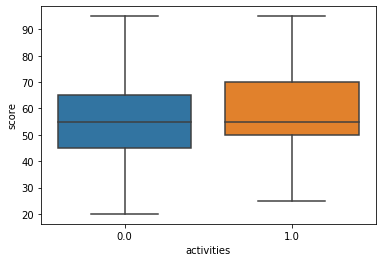

In [71]:
boxplot('activities')

### 12. Параметр "nursery". Количество пропусков - 12.

In [72]:
score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      320 non-null    object 
 1   sex         320 non-null    object 
 2   age         320 non-null    int64  
 3   address     306 non-null    object 
 4   famsize     298 non-null    object 
 5   Pstatus     286 non-null    object 
 6   Medu        320 non-null    float64
 7   Fedu        320 non-null    object 
 8   Mjob        303 non-null    object 
 9   Fjob        290 non-null    object 
 10  reason      306 non-null    object 
 11  guardian    292 non-null    object 
 12  traveltime  320 non-null    float64
 13  studytime   320 non-null    float64
 14  failures    320 non-null    float64
 15  schoolsup   320 non-null    float64
 16  famsup      320 non-null    float64
 17  paid        320 non-null    float64
 18  activities  320 non-null    float64
 19  nursery     308 non-null    f

In [73]:
score.nursery.value_counts()

1.0    246
0.0     62
Name: nursery, dtype: int64

Для заполнения пропусков можно использовать корреляцию с параметром "Medu".

In [74]:
score.pivot_table(index=['Medu'],
                  values='activities', aggfunc='median', fill_value=0)

,activities
Medu,
0.0,0.0
1.0,0.0
2.0,0.5
3.0,0.0
4.0,1.0


In [75]:
parameter='nursery'
fill_parameter(fill_nursery)

1.0    253
0.0     67
Name: nursery, dtype: int64

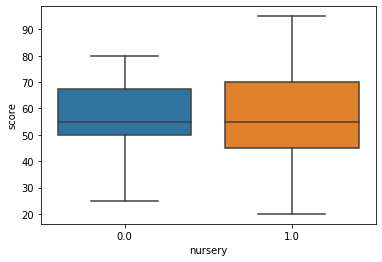

In [76]:
boxplot('nursery')

### 13. Параметр "internet". 29 пропусков.

In [77]:
score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      320 non-null    object 
 1   sex         320 non-null    object 
 2   age         320 non-null    int64  
 3   address     306 non-null    object 
 4   famsize     298 non-null    object 
 5   Pstatus     286 non-null    object 
 6   Medu        320 non-null    float64
 7   Fedu        320 non-null    object 
 8   Mjob        303 non-null    object 
 9   Fjob        290 non-null    object 
 10  reason      306 non-null    object 
 11  guardian    292 non-null    object 
 12  traveltime  320 non-null    float64
 13  studytime   320 non-null    float64
 14  failures    320 non-null    float64
 15  schoolsup   320 non-null    float64
 16  famsup      320 non-null    float64
 17  paid        320 non-null    float64
 18  activities  320 non-null    float64
 19  nursery     320 non-null    f

In [78]:
score.internet.value_counts()

1.0    246
0.0     45
Name: internet, dtype: int64

Какой-либо заметной корреляции между "internet" и другими параметрам выделить невозможно. Так как пропусковдовольно много, заменим их на "no data" 

In [79]:
parameter='internet'
fill_parameter(fill_no_data)

1.0        246
0.0         45
no data     29
Name: internet, dtype: int64

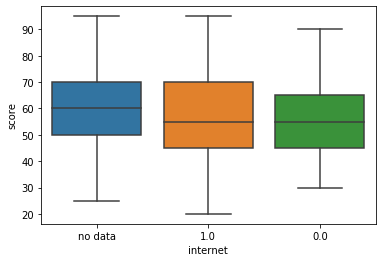

In [80]:
boxplot('internet')

### 14. Параметр "romantic". 25 пропусков.

In [81]:
score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      320 non-null    object 
 1   sex         320 non-null    object 
 2   age         320 non-null    int64  
 3   address     306 non-null    object 
 4   famsize     298 non-null    object 
 5   Pstatus     286 non-null    object 
 6   Medu        320 non-null    float64
 7   Fedu        320 non-null    object 
 8   Mjob        303 non-null    object 
 9   Fjob        290 non-null    object 
 10  reason      306 non-null    object 
 11  guardian    292 non-null    object 
 12  traveltime  320 non-null    float64
 13  studytime   320 non-null    float64
 14  failures    320 non-null    float64
 15  schoolsup   320 non-null    float64
 16  famsup      320 non-null    float64
 17  paid        320 non-null    float64
 18  activities  320 non-null    float64
 19  nursery     320 non-null    f

In [82]:
score.romantic.value_counts()

0.0    200
1.0     95
Name: romantic, dtype: int64

Ситуация аналогично предыдущему параметру. Заполним пропуски значением "no data".

In [83]:
parameter='romantic'
fill_parameter(fill_no_data)

0.0        200
1.0         95
no data     25
Name: romantic, dtype: int64

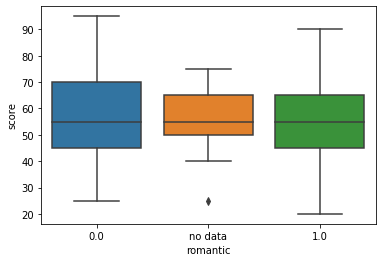

In [84]:
boxplot('romantic')

### 15. Параметр "famrel". 23 пропуска.

In [85]:
score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      320 non-null    object 
 1   sex         320 non-null    object 
 2   age         320 non-null    int64  
 3   address     306 non-null    object 
 4   famsize     298 non-null    object 
 5   Pstatus     286 non-null    object 
 6   Medu        320 non-null    float64
 7   Fedu        320 non-null    object 
 8   Mjob        303 non-null    object 
 9   Fjob        290 non-null    object 
 10  reason      306 non-null    object 
 11  guardian    292 non-null    object 
 12  traveltime  320 non-null    float64
 13  studytime   320 non-null    float64
 14  failures    320 non-null    float64
 15  schoolsup   320 non-null    float64
 16  famsup      320 non-null    float64
 17  paid        320 non-null    float64
 18  activities  320 non-null    float64
 19  nursery     320 non-null    f

In [86]:
score.famrel.value_counts()

 4.0    148
 5.0     78
 3.0     52
 2.0     14
 1.0      4
-1.0      1
Name: famrel, dtype: int64

Здесь одно из значений не входит в предполагаемый диапазон, и скорее всего является опиской, и должно быть равно 1. Такжепропуски можно заполнить медианным значением.

In [87]:
def fill_famrel(row):
    if row['famrel'] == (-1):
        return 1
    return row['famrel']


score['famrel'] = score.apply(fill_famrel, axis=1)

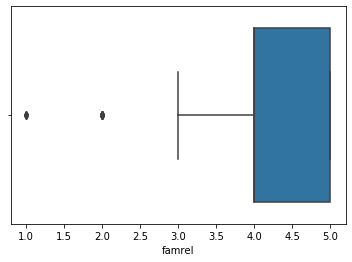

In [88]:
sns.boxplot(x='famrel', data=score)

In [89]:
score.drop(del_emissions('famrel'), inplace=True, axis=0)

In [90]:
parameter='famrel'
fill_parameter(fill_median)

4.0    171
5.0     78
3.0     52
Name: famrel, dtype: int64

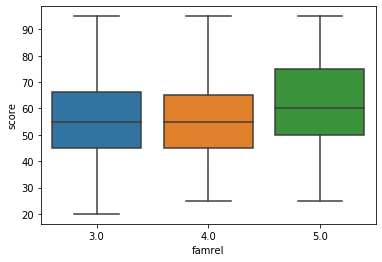

In [91]:
boxplot('famrel')

### 16. Параметр "freetime". Количество пропусков - 7.

In [92]:
score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      301 non-null    object 
 1   sex         301 non-null    object 
 2   age         301 non-null    int64  
 3   address     287 non-null    object 
 4   famsize     280 non-null    object 
 5   Pstatus     269 non-null    object 
 6   Medu        301 non-null    float64
 7   Fedu        301 non-null    object 
 8   Mjob        285 non-null    object 
 9   Fjob        272 non-null    object 
 10  reason      288 non-null    object 
 11  guardian    275 non-null    object 
 12  traveltime  301 non-null    float64
 13  studytime   301 non-null    float64
 14  failures    301 non-null    float64
 15  schoolsup   301 non-null    float64
 16  famsup      301 non-null    float64
 17  paid        301 non-null    float64
 18  activities  301 non-null    float64
 19  nursery     301 non-null    f

In [93]:
score.freetime.value_counts()

3.0    112
4.0     92
2.0     49
5.0     29
1.0     12
Name: freetime, dtype: int64

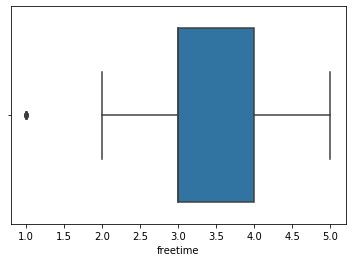

In [94]:
sns.boxplot(x='freetime', data=score)

In [95]:
score.drop(del_emissions('freetime'), inplace=True, axis=0)

Заполним пропуски медианным значением.

In [96]:
parameter='freetime'
fill_parameter(fill_median)

3.0    119
4.0     92
2.0     49
5.0     29
Name: freetime, dtype: int64

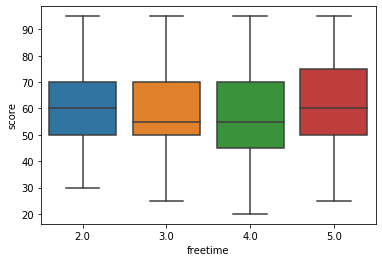

In [97]:
boxplot('freetime')

### 17. Параметр "goout". 5 пропусков.

In [98]:
score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      289 non-null    object 
 1   sex         289 non-null    object 
 2   age         289 non-null    int64  
 3   address     275 non-null    object 
 4   famsize     268 non-null    object 
 5   Pstatus     259 non-null    object 
 6   Medu        289 non-null    float64
 7   Fedu        289 non-null    object 
 8   Mjob        274 non-null    object 
 9   Fjob        261 non-null    object 
 10  reason      277 non-null    object 
 11  guardian    263 non-null    object 
 12  traveltime  289 non-null    float64
 13  studytime   289 non-null    float64
 14  failures    289 non-null    float64
 15  schoolsup   289 non-null    float64
 16  famsup      289 non-null    float64
 17  paid        289 non-null    float64
 18  activities  289 non-null    float64
 19  nursery     289 non-null    f

In [99]:
score.goout.value_counts()

3.0    99
2.0    72
4.0    67
5.0    31
1.0    15
Name: goout, dtype: int64

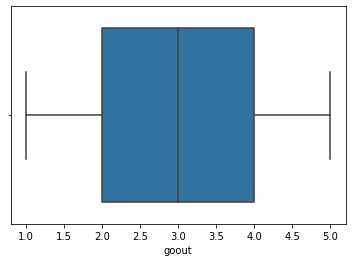

In [100]:
sns.boxplot(x='goout', data=score)

Здесь также заполним пропуски медианным значением.

In [101]:
parameter='goout'
fill_parameter(fill_median)

3.0    104
2.0     72
4.0     67
5.0     31
1.0     15
Name: goout, dtype: int64

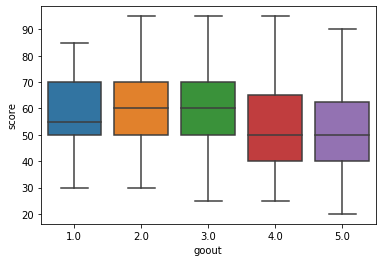

In [102]:
boxplot('goout')

### 18. Параметр "health". 9 пропусков.

In [103]:
score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      289 non-null    object 
 1   sex         289 non-null    object 
 2   age         289 non-null    int64  
 3   address     275 non-null    object 
 4   famsize     268 non-null    object 
 5   Pstatus     259 non-null    object 
 6   Medu        289 non-null    float64
 7   Fedu        289 non-null    object 
 8   Mjob        274 non-null    object 
 9   Fjob        261 non-null    object 
 10  reason      277 non-null    object 
 11  guardian    263 non-null    object 
 12  traveltime  289 non-null    float64
 13  studytime   289 non-null    float64
 14  failures    289 non-null    float64
 15  schoolsup   289 non-null    float64
 16  famsup      289 non-null    float64
 17  paid        289 non-null    float64
 18  activities  289 non-null    float64
 19  nursery     289 non-null    f

In [104]:
score.health.value_counts()

5.0    107
3.0     65
4.0     45
1.0     33
2.0     30
Name: health, dtype: int64

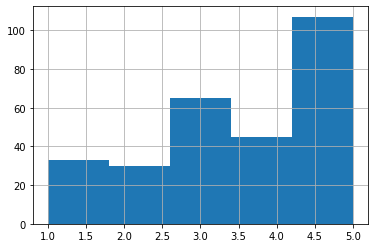

In [105]:
score.health.hist(bins=5)

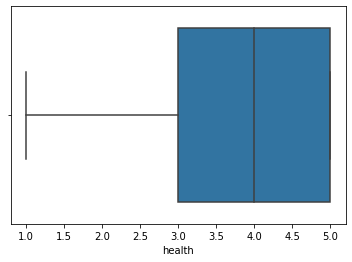

In [106]:
sns.boxplot(x='health', data=score)

In [107]:
score.health.median()

4.0

Медианное значение в данном случае не совпадает с максимальным, поэтому пропуски лучше заменить "no date".

In [108]:
parameter='health'
fill_parameter(fill_no_data)

5.0        107
3.0         65
4.0         45
1.0         33
2.0         30
no data      9
Name: health, dtype: int64

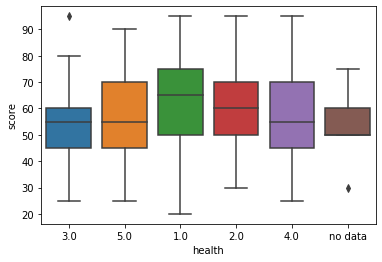

In [109]:
boxplot('health')

### 19. Параметр "absences". 10 пропусков. Так как значений много посмотрим распределение значений по группам.

In [110]:
score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      289 non-null    object 
 1   sex         289 non-null    object 
 2   age         289 non-null    int64  
 3   address     275 non-null    object 
 4   famsize     268 non-null    object 
 5   Pstatus     259 non-null    object 
 6   Medu        289 non-null    float64
 7   Fedu        289 non-null    object 
 8   Mjob        274 non-null    object 
 9   Fjob        261 non-null    object 
 10  reason      277 non-null    object 
 11  guardian    263 non-null    object 
 12  traveltime  289 non-null    float64
 13  studytime   289 non-null    float64
 14  failures    289 non-null    float64
 15  schoolsup   289 non-null    float64
 16  famsup      289 non-null    float64
 17  paid        289 non-null    float64
 18  activities  289 non-null    float64
 19  nursery     289 non-null    f

In [111]:
score.absences.value_counts(bins=8)

(-0.213, 26.5]    273
(26.5, 53.0]        3
(53.0, 79.5]        2
(185.5, 212.0]      1
(159.0, 185.5]      0
(132.5, 159.0]      0
(106.0, 132.5]      0
(79.5, 106.0]       0
Name: absences, dtype: int64

Обнаружено, что абсолютное большинство студентов имеют менее 50 пропусков. Рассмотрим детальнее. 

In [112]:
score[score.absences<24].absences.value_counts(bins=8)

(-0.024, 2.875]    118
(2.875, 5.75]       54
(5.75, 8.625]       39
(11.5, 14.375]      19
(8.625, 11.5]       19
(17.25, 20.125]      9
(14.375, 17.25]      8
(20.125, 23.0]       4
Name: absences, dtype: int64

In [113]:
score.absences.median()

4.0

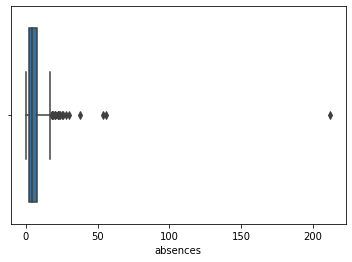

In [114]:
sns.boxplot(x='absences', data=score)

Наблюдается большое количество выбросов, причем медианное значение довольно низкое. Удалив все пропуски, можно потерять большое количество информации, между тем из предварительного корреляционного анализа видна очень слабая корреляция, поэтому эту колонку учитывать не будем.

In [115]:
score.drop('absences', inplace=True, axis=1)

### 20. Параметр "school". Пропусков нет.

In [116]:
score.school.value_counts()

GP    253
MS     36
Name: school, dtype: int64

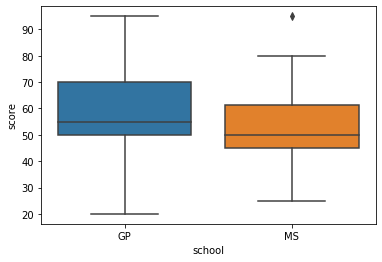

In [117]:
display(boxplot('school'))

### 21. Параметр "address".

In [118]:
score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 394
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      289 non-null    object 
 1   sex         289 non-null    object 
 2   age         289 non-null    int64  
 3   address     275 non-null    object 
 4   famsize     268 non-null    object 
 5   Pstatus     259 non-null    object 
 6   Medu        289 non-null    float64
 7   Fedu        289 non-null    object 
 8   Mjob        274 non-null    object 
 9   Fjob        261 non-null    object 
 10  reason      277 non-null    object 
 11  guardian    263 non-null    object 
 12  traveltime  289 non-null    float64
 13  studytime   289 non-null    float64
 14  failures    289 non-null    float64
 15  schoolsup   289 non-null    float64
 16  famsup      289 non-null    float64
 17  paid        289 non-null    float64
 18  activities  289 non-null    float64
 19  nursery     289 non-null    f

In [119]:
parameter='address'
fill_parameter(fill_address)

U    229
R     60
Name: address, dtype: int64

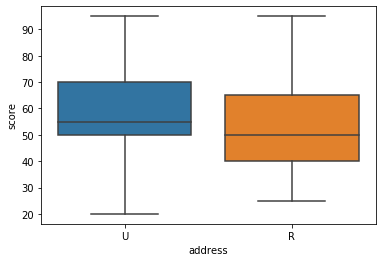

In [120]:
boxplot('address')

### 22. Параметр "famsize". 21 пропуск.

In [121]:
score.famsize.value_counts()

GT3    189
LE3     79
Name: famsize, dtype: int64

Заполним пропуски значением "no data".

In [122]:
parameter='famsize'
fill_parameter(fill_no_data)

GT3        189
LE3         79
no data     21
Name: famsize, dtype: int64

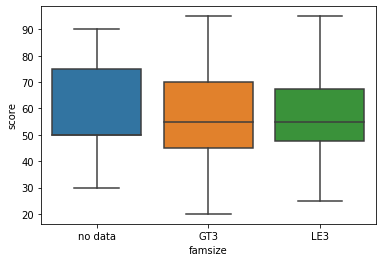

In [123]:
boxplot('famsize')

### 23. Параметр "Pstatus". Также много пропусков, заполним пропуски аналогично предыдущему параметру.

In [124]:
parameter='Pstatus'
fill_parameter(fill_no_data)

T          233
no data     30
A           26
Name: Pstatus, dtype: int64

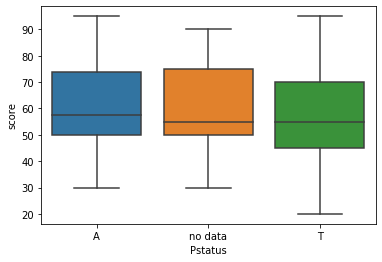

In [125]:
boxplot('Pstatus')

### 24. Параметр "Mjob". 15 пропусков заполним значением "no data".

In [126]:
score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 394
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      289 non-null    object 
 1   sex         289 non-null    object 
 2   age         289 non-null    int64  
 3   address     289 non-null    object 
 4   famsize     289 non-null    object 
 5   Pstatus     289 non-null    object 
 6   Medu        289 non-null    float64
 7   Fedu        289 non-null    object 
 8   Mjob        274 non-null    object 
 9   Fjob        261 non-null    object 
 10  reason      277 non-null    object 
 11  guardian    263 non-null    object 
 12  traveltime  289 non-null    float64
 13  studytime   289 non-null    float64
 14  failures    289 non-null    float64
 15  schoolsup   289 non-null    float64
 16  famsup      289 non-null    float64
 17  paid        289 non-null    float64
 18  activities  289 non-null    float64
 19  nursery     289 non-null    f

In [127]:
parameter='Mjob'
fill_parameter(fill_no_data)

other       92
services    73
teacher     46
at_home     41
health      22
no data     15
Name: Mjob, dtype: int64

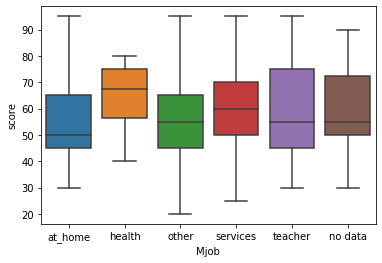

In [128]:
boxplot('Mjob')

Более высокий балл имеют студенты, чьи матери работают в системе здравоохранения. Создадим новый параметр "Mhealth", который показывает работает ли мать студента в системе здравоохранения.

In [129]:
score['Mhealth']=score.apply(fill_Mhealth, axis=1)

### 25. Параметр "Fjob". 28 пропуска заполним значением "no data".

In [130]:
parameter='Fjob'
fill_parameter(fill_no_data)

other       143
services     73
no data      28
teacher      20
at_home      14
health       11
Name: Fjob, dtype: int64

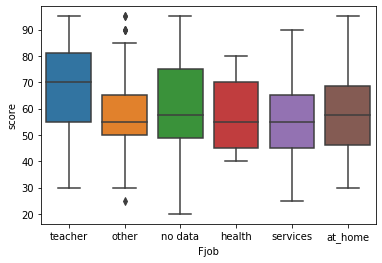

In [131]:
boxplot('Fjob')

В этом случае также заметны лучшие результаты у группы тудентов, чьи отцы являются учителями. Также выделим этот признак в отдельный параметр "Fteacher".

In [132]:
score['Fteacher']=score.apply(fill_Fteacher, axis=1)

### 26. Параметр "reason". 12 пропусков также заполним значением "no data".

In [133]:
parameter='reason'
fill_parameter(fill_no_data)

course        104
home           74
reputation     71
other          28
no data        12
Name: reason, dtype: int64

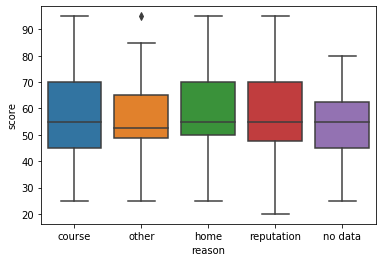

In [134]:
boxplot('reason')

### 27. Параметр "guardian". 26 пропусков также заполним значением "no data".

In [135]:
parameter='guardian'
fill_parameter(fill_no_data)

mother     182
father      63
no data     26
other       18
Name: guardian, dtype: int64

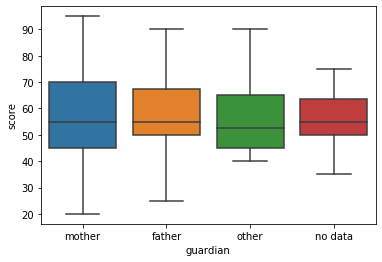

In [136]:
boxplot('guardian')

Наконец обработанные данные можно оценить на наличие статистически значимых различий и выделить параметры,  которые могут быть наиболее полезны при построениии модели ML.

In [137]:
score.corr()

,age,Medu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,famrel,freetime,goout,score,Mhealth,Fteacher
age,1.000000,-0.144090,0.166829,0.059974,0.268720,-0.271252,-0.119013,-0.037191,-0.136760,-0.126136,-0.145706,0.011495,-0.006369,0.149721,-0.154779,-0.096168,-0.042480
Medu,-0.144090,1.000000,-0.104003,0.096665,-0.203979,-0.022855,0.211203,0.210306,0.148094,0.236980,0.226734,0.127919,0.019846,0.089523,0.190695,0.214043,0.256310
traveltime,0.166829,-0.104003,1.000000,-0.124169,0.062718,-0.041610,-0.016736,-0.027318,-0.018144,-0.061169,-0.106459,-0.037166,-0.090236,-0.022394,-0.060108,-0.092232,-0.009412
studytime,0.059974,0.096665,-0.124169,1.000000,-0.104263,-0.015785,0.106303,0.164661,0.066669,0.033362,0.145921,0.083004,-0.086071,-0.003712,0.121882,-0.022819,-0.006893
failures,0.268720,-0.203979,0.062718,-0.104263,1.000000,0.076022,-0.052402,-0.129724,-0.089124,-0.133412,-0.237380,0.016059,0.161934,0.100416,-0.267330,-0.026919,-0.062317
schoolsup,-0.271252,-0.022855,-0.041610,-0.015785,0.076022,1.000000,0.073573,-0.040608,0.048547,0.024537,0.014085,-0.027912,0.016972,-0.003615,-0.231895,-0.108280,0.062285
famsup,-0.119013,0.211203,-0.016736,0.106303,-0.052402,0.073573,1.000000,0.340196,-0.023581,0.071576,0.062808,-0.008086,0.004983,-0.046743,-0.042498,0.152215,0.024454
paid,-0.037191,0.210306,-0.027318,0.164661,-0.129724,-0.040608,0.340196,1.000000,0.003595,0.114822,0.150802,-0.084352,-0.049978,0.082455,-0.044939,0.079280,-0.053591
activities,-0.136760,0.148094,-0.018144,0.066669,-0.089124,0.048547,-0.023581,0.003595,1.000000,0.036993,0.007211,0.057659,0.044104,-0.019821,0.054523,-0.037048,0.044188
nursery,-0.126136,0.236980,-0.061169,0.033362,-0.133412,0.024537,0.071576,0.114822,0.036993,1.000000,0.081408,0.059343,0.022519,0.078971,0.031878,0.058823,0.014088


На основании полученных коэффициентов корреляции нельзя выделить какой-либо параметр с сильной корреляцией. Выберем параметры с коэффициентом более 0.1: "age", "Medu", "studytime", "failures", "schoolsup", "goout", "Mhealth", "Fteacher".

In [138]:
score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      289 non-null    object 
 1   sex         289 non-null    object 
 2   age         289 non-null    int64  
 3   address     289 non-null    object 
 4   famsize     289 non-null    object 
 5   Pstatus     289 non-null    object 
 6   Medu        289 non-null    float64
 7   Fedu        289 non-null    object 
 8   Mjob        289 non-null    object 
 9   Fjob        289 non-null    object 
 10  reason      289 non-null    object 
 11  guardian    289 non-null    object 
 12  traveltime  289 non-null    float64
 13  studytime   289 non-null    float64
 14  failures    289 non-null    float64
 15  schoolsup   289 non-null    float64
 16  famsup      289 non-null    float64
 17  paid        289 non-null    float64
 18  activities  289 non-null    float64
 19  nursery     289 non-null    f

In [139]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Fedu', 'Mjob', 'Fjob', 'reason', 
            'guardian', 'internet', 'romantic', 'health']:
    if col == 'score':
        continue
    get_stat_dif(col)

Найдены статистически значимые различия для параметра school
Найдены статистически значимые различия для параметра address
Найдены статистически значимые различия для параметра Fedu
Найдены статистически значимые различия для параметра Mjob
Найдены статистически значимые различия для параметра Fjob


### Вывод: параметры, которые следует использовать для последующих исследований: "school", "address", "age", "Medu", "Fedu", "Mjob", "Fjob", "studytime", "failures", "schoolsup", "goout", "Mhealth", "Fteacher".